<a href="https://colab.research.google.com/github/ardayekh/ProfessionalDataEngineer/blob/main/Modernizing_Data_Lakes_and_Data_Warehouses_with_GCP_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red">**--------------------[Week1 - Day1]--------------------**

<font color="green">**Video#1: Explore the role of a data engineer**

- A data engineer is someone who builds data pipelines

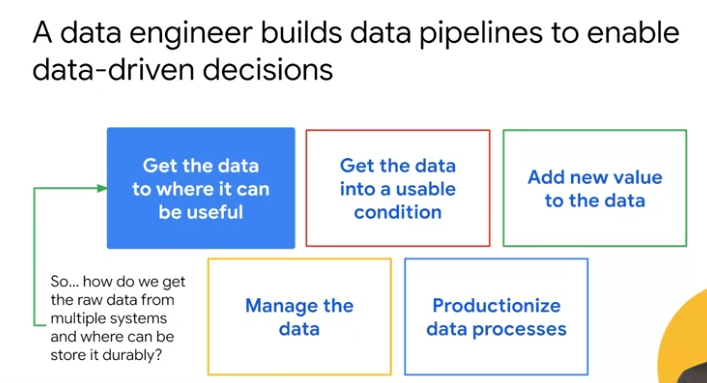

- Data pipelines are built in order to get data into a usable condition and move it to a location where data can be used for analytics to drive business decisions
- Data lakes bring dat from across the Enterprise (spreadsheets, relational DBs etc.) into a single location

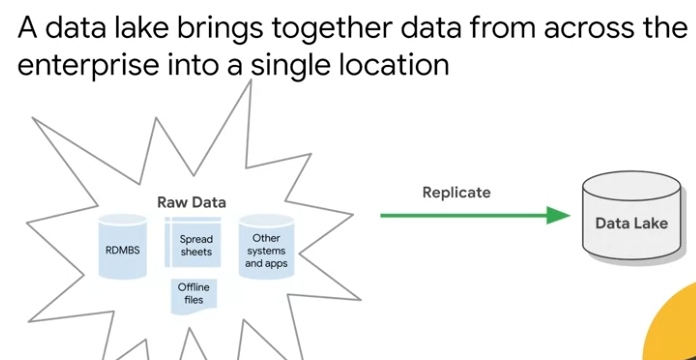

- a Cloud storage bucket is one way to build a data lake on the Google Cloud
- Cloud SQL can be used as a storage location for RDBs

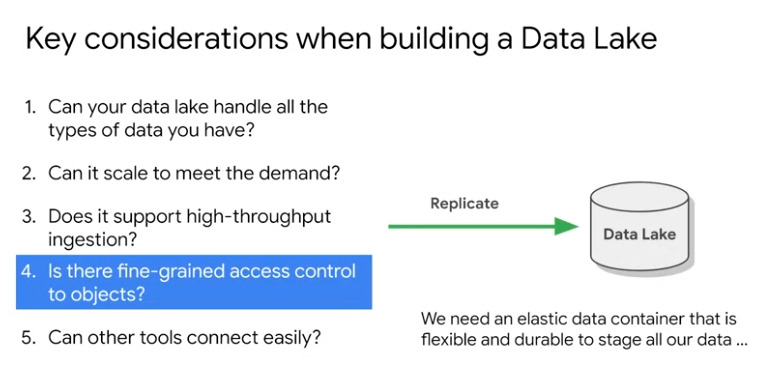

- Cloud storgae buckets allows you store raw data in many formats (such as csv, avro, parquet, json etc.)
- You can then directly load and query them using BigQuery which is a data Warehouse
- A data warehouse is similar to the Data Lake except that the data in it is cleaned, joinable, effeciently queriable and ready for use by analytics
- Other cloud products and services can also integrate with the buckets
- If data requires processing before being queried, then Cloud Dataproc and Cloud Dataflow can be used for batch processing (ETL)
- Also, Cloud Dataflow, along with Cloud Pub/Sub can be used for streaming data processing which you can then stream it into BigQuery

<font color="green">**Video#2: Analyze data engineering challenges**

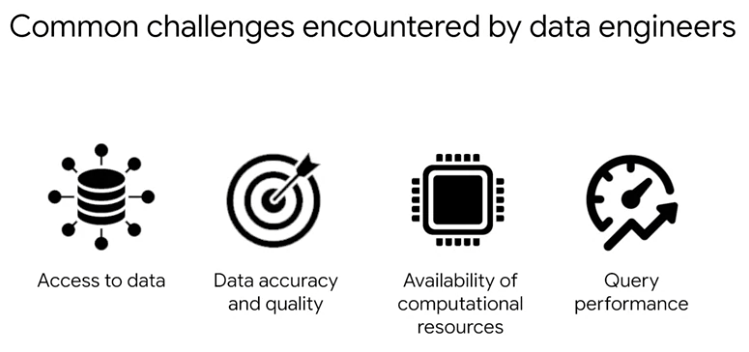


- Data access can pose a challenge depending on use case mainly because data is siloed (exists in multiple systems as in the illustration below)

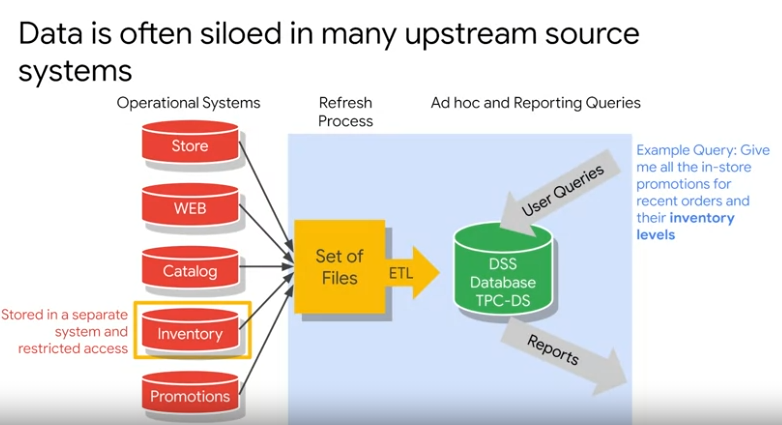

- Data quality and accuracy requires that you build an ETL pipeline to load to the data warehouse
- When building a pipeline, it is important to think about the use case of this data to make sure all the data exists and effeiciently queriable by the time it makes it to the warehouse
- when building an ETL pipeline, many problems can exist with the data (Missing data, all timestamps in UTC, lists stored in files or manual spread sheets, data available only on the web etc.)
- If too many cleansing and preocessing is required in the ETL, then another problem that we may face is limitaions in the computaional resources (msinly an on-prem probelm since engineers will be required to manage server and cluster capacity to make sure that there is enough capacity exists to complete the ETL at the time we need it to finish
- This could lead to over/under provisioning of resources as follows:

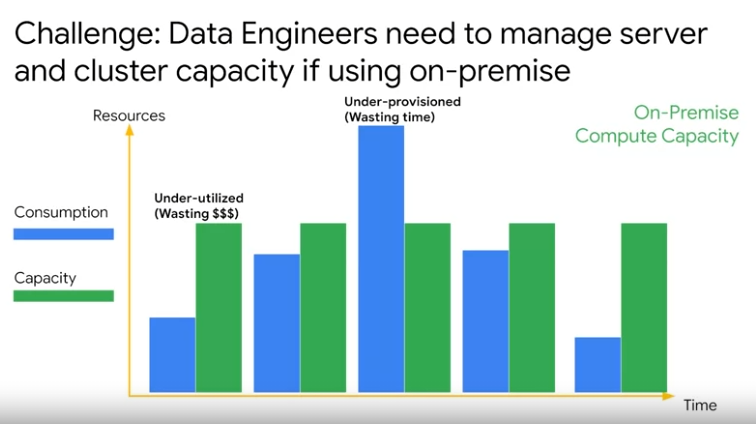

- once data is in warehouse, we have to make sure that queries are optimized to make the most out of the compute resources whcih can pose the following challenges in on-prem systems

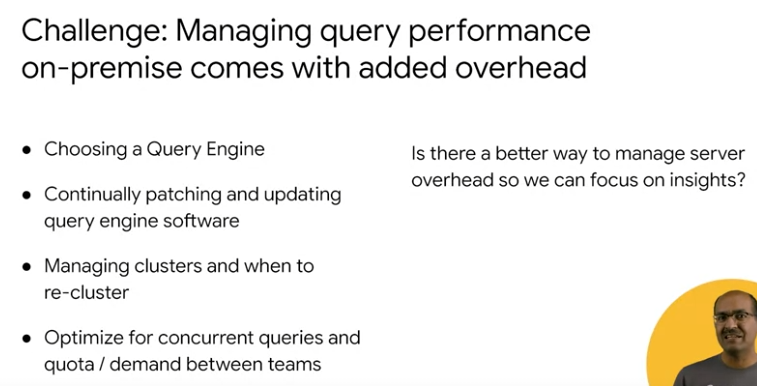

<font color='green'>**Video#3: Intro to BigQuery**

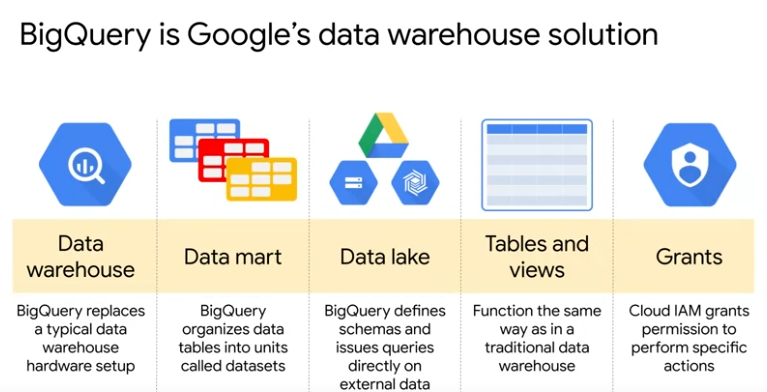

- each query in bigquery is allocated a certain number of slots which is in turn a certain amount of CPUs and RAM

<font color='green'>**Video#4: Data Lakes and Data Warehouses**

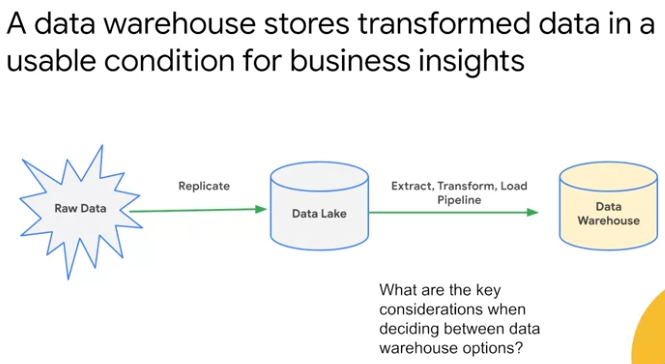

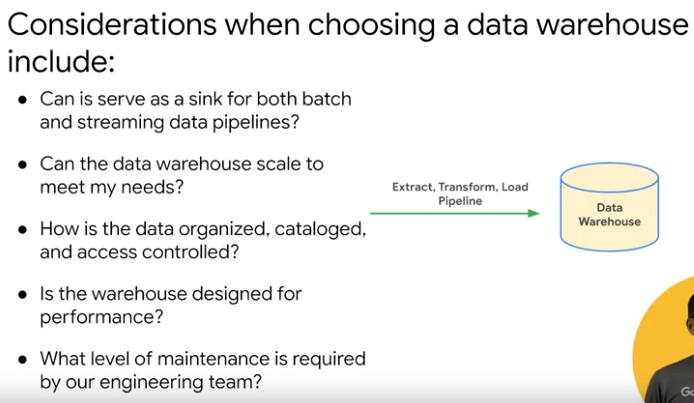

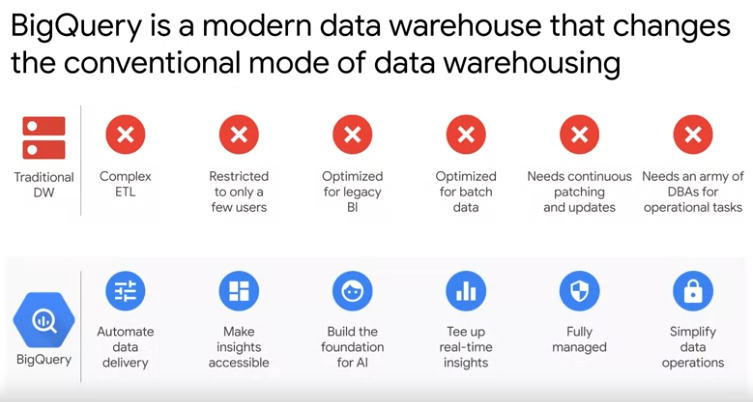

- As well as using BigQuery as a Data warehouse, you can also use it only as a query engine for an underying warehouse DB such as in CLoud SQL as illustrated below

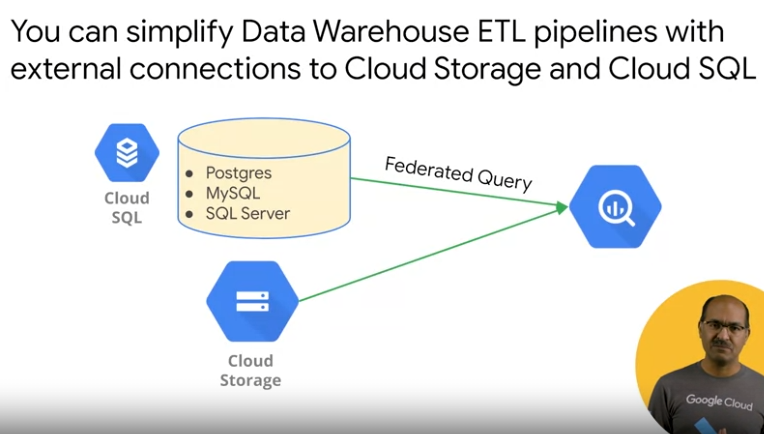

<font color='green'> **Video#5: Demo: Federated Queries with BigQuery**
- To query data from Google Sheets, create a new table under a dataset in your project, and specify source of that data as Google sheet in Google Drive
- When Google sheet is updated, the BigQuery table is automaticall updated
- Queries against tables sourced from Google Sheet will not be cached hoever (each time you run the query it will use resources) as it is an external source not native to BigQuery

<font color='green'>**Video#6: Transactional Databases vs Data Warehouses**
- Cloud SQL

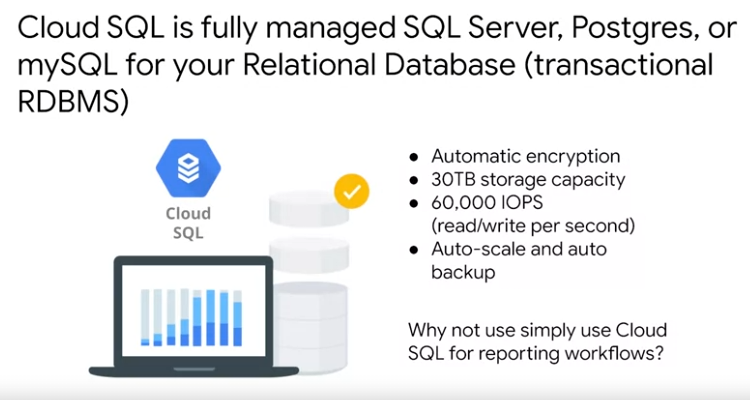

- one may ask why not use Cloud SQL for reporting since you can run SQL directly from it
- Cloud SQL is optimized for transactional use cases (high-throughput writes instead of high-read data as in warehouses)

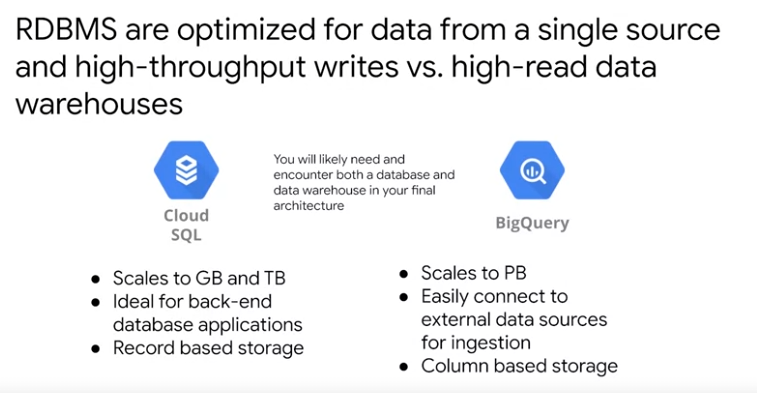

- Record based storage means that the whole record must be openned on disk even if you only seect a single column in your query
- Column based storage allows for reading single columns from disk

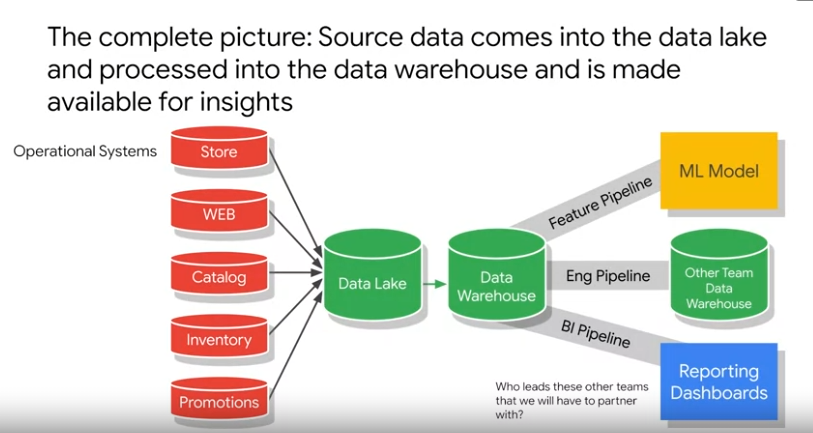

- Data Lakes are desgined for durability and high availability

<font color='green'>**Video#7: Partner effectively with other data teams**
- Users of Datawarehouse data are most likely Machine Learning Engineers, Data Analysts or other Data Engineers
- ML Eng. rely on lots of high quality data to train test and evaluate their models
- Two common questions typically asked by ML engineers is how long does it take a transaction to make it from raw data to the data warehouse (so that the data is available at the time of prediction) and how difficult it is to add columns and rows to the data as ML Engineers are always testing the relationship between features and labels
- You will earn the trust of your partner Machine Learning teams by making your data sets easily discoverable, documented and available to them to experiment on quickly.
- Another team that relys on DW data are BI teams (business intelligence data analysts)
- These teams need datasets that have clearly defined schema definitions, the ability to quickly preview rows, and the performance to scale too many concurrent dashboard users.
- BigQuery BI Engine is a google cloud tool built for this purpose

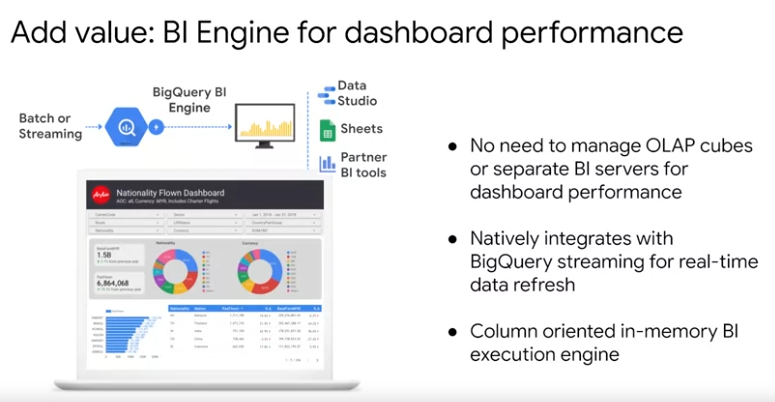

- Other data engineers that rely on your pipeline will often ask how can you ensure that this data pipeline that we depend on will always be available when we need it? Or they might ask we're noticing high demand for certain really popular datasets, can you monitor and scale the health of your entire data ecosystem so we know that the data is available whenever we needed?
- Stack driver helps in monitoring by showing query counts and bytes queried along with spending and cost of resources used and other measurements

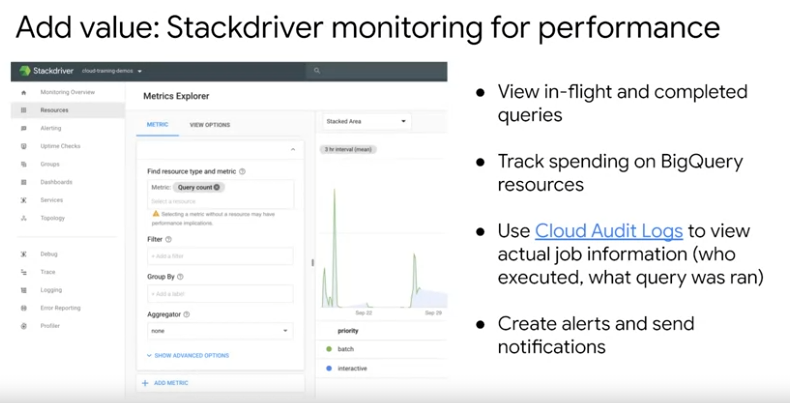

<font color='green'>**Video#8: Manage data access and governance**
- Data engineers must also manage the data inlcuding topics such privacy & Secutiry
- This is where the data access policy comes in

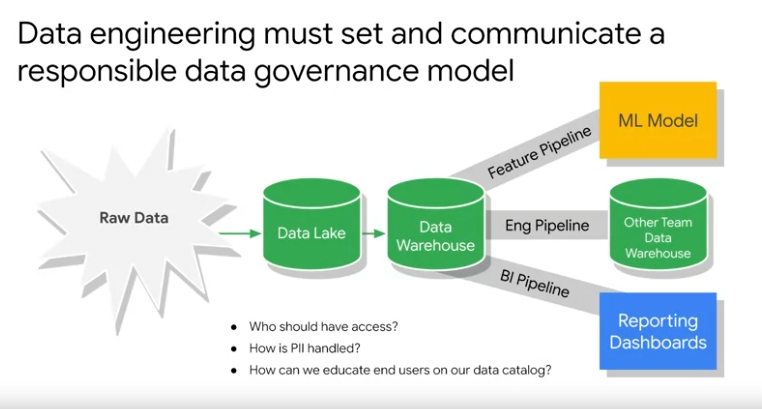

- One solution for data governance is Cloud data catalog and cloud data loss prevention APIs
- Cloud data catalog makes all the metadata on your data available for your users to search
- You can group certain datasets together with tags and flag certains columns as sensitive etc
- Cloud Data Loss Prevention API (DLP) helps you better understand and manage sensitive data. It provides fast scalable classification and redaction for sensitive data elements, like credit card numbers, names. Social Security numbers, selected international identifier numbers, phone numbers, GCP credentials, etc.

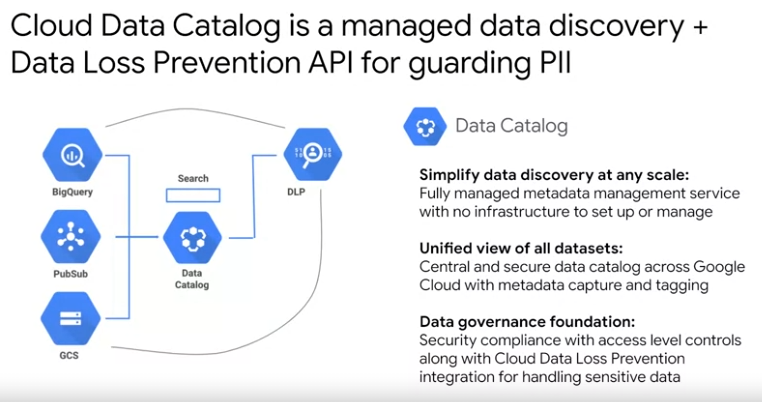

<font color='green'>**Video#10: Build production-ready pipelines
- Productionzing the data process: Once the data lakes and warehouses are setup it's time to productionize the whole operation and automate and monitor as much of it as we can
- Common questions that you should ask at this phase are; How can we ensure pipeline health and data cleanliness? How do you productionize these pipelines to minimize maintenance and maximize uptime? How do we respond and adapt to changing schemas and business needs? Are we using the latest data engineering tools and best practices?
- One common workflow orchestration tool used by enterprises is Apache Airflow and Google Cloud has a fully managed version of Apache Airflow called Cloud Composer. 
-  Cloud Composer helps your data engineering team orchestrate the pieces to the data engineering puzzle. For example when a new CSV file gets dropped into Cloud storage, you can automatically have that trigger an event that kicks off a data processing workflow and puts the data in the CSP file directly into your data warehouse.
- A Cloud Composer job can then run every night or every hour and kickoff your entire pipeline from broad data to the data lake and into the data warehouse for you.

Summary:

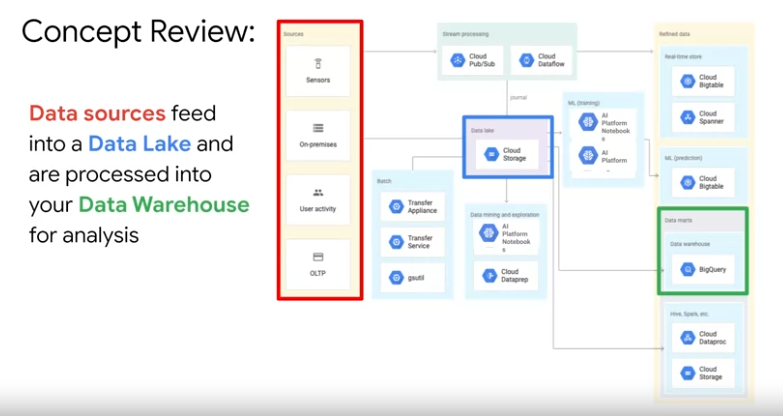

Lab queries

SELECT
  MIN(start_station_name) AS start_station_name,
  MIN(end_station_name) AS end_station_name,
  APPROX_QUANTILES(tripduration, 10)[OFFSET (5)] AS typical_duration,
  COUNT(tripduration) AS num_trips
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE
  start_station_id != end_station_id
GROUP BY
  start_station_id,
  end_station_id
ORDER BY
  num_trips DESC
LIMIT
  10

  ---------------

  WITH
  trip_distance AS (
SELECT
  bikeid,
  ST_Distance(ST_GeogPoint(s.longitude,
      s.latitude),
    ST_GeogPoint(e.longitude,
      e.latitude)) AS distance
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`,
  `bigquery-public-data.new_york_citibike.citibike_stations` as s,
  `bigquery-public-data.new_york_citibike.citibike_stations` as e
WHERE
  start_station_id = s.station_id
  AND end_station_id = e.station_id )
SELECT
  bikeid,
  SUM(distance)/1000 AS total_distance
FROM
  trip_distance
GROUP BY
  bikeid
ORDER BY
  total_distance DESC
LIMIT
  5
  ---
  SELECT
  wx.date,
  wx.value/10.0 AS prcp
FROM
  `bigquery-public-data.ghcn_d.ghcnd_2015` AS wx
WHERE
  id = 'USW00094728'
  AND qflag IS NULL
  AND element = 'PRCP'
ORDER BY
  wx.date
-----

WITH bicycle_rentals AS (
  SELECT
    COUNT(starttime) as num_trips,
    EXTRACT(DATE from starttime) as trip_date
  FROM `bigquery-public-data.new_york_citibike.citibike_trips`
  GROUP BY trip_date
),

rainy_days AS
(
SELECT
  date,
  (MAX(prcp) > 5) AS rainy
FROM (
  SELECT
    wx.date AS date,
    IF (wx.element = 'PRCP', wx.value/10, NULL) AS prcp
  FROM
    `bigquery-public-data.ghcn_d.ghcnd_2015` AS wx
  WHERE
    wx.id = 'USW00094728'
)
GROUP BY
  date
)

SELECT
  ROUND(AVG(bk.num_trips)) AS num_trips,
  wx.rainy
FROM bicycle_rentals AS bk
JOIN rainy_days AS wx
ON wx.date = bk.trip_date
GROUP BY wx.rainy

#<font color="red">**--------------------[Week1 - Day2]--------------------**

<font color='green'>**Video#1: Introduction to Data Lakes**
- Components of data engineer process: Source --> Data Lake --> Orchestration Workflows/Pipeline --> Data Warehouse --> Data Analytics/ML
- Workers are individual virtual machines that preocess the data coming from the lake and make them suitable for consumption downstream
- Orchestratoin layer: this is where you can schedule workflows based on certain events (e.g. when a csv file is loaded into a particular cloud storgage bucket, trigger a pipeline for processing and once done processing stream it to warehouse and once in warehouse trigger ML training etc.)
- Orchestration layer is implemented by Apche Airflow running on Cloud Composer layer
- Cloud Storage is one of the few good options for data lakes on GCP but it is not the only option
- Big Query can be your data lake and datawarehouse without using cloud storage
- Cloud lake is a single place for all the raw data and can be thought of as a durable staging are
- Below is a list of categorized GCP products

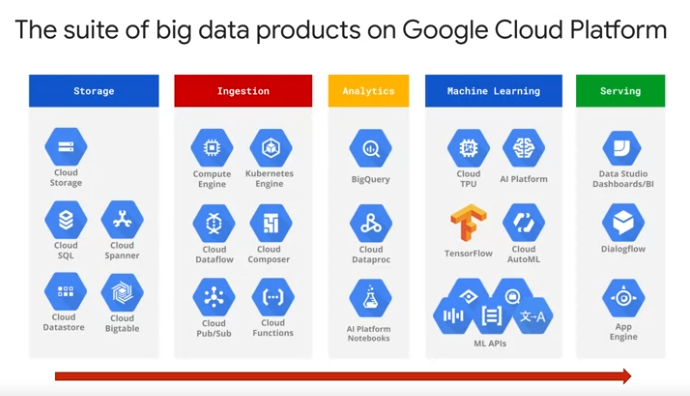

- The format of data in the data lake is driven by the application the is loading that data into the lake (csv, blobs, json etc.)

<font color='green'>**Video#2: Data Storage and ETL options on GCP**
cloudcloud.

- Cloud SQL and Cloud Spanner are for relatioal DBs while Cloud Firestore and Bigtable are for NoSQL storage
- To choose which option to choose we have to ask the following questions
  - Where is your data now
  - How big is your data
  - where it has to go
  - how much transformation is needed to make it usable for business

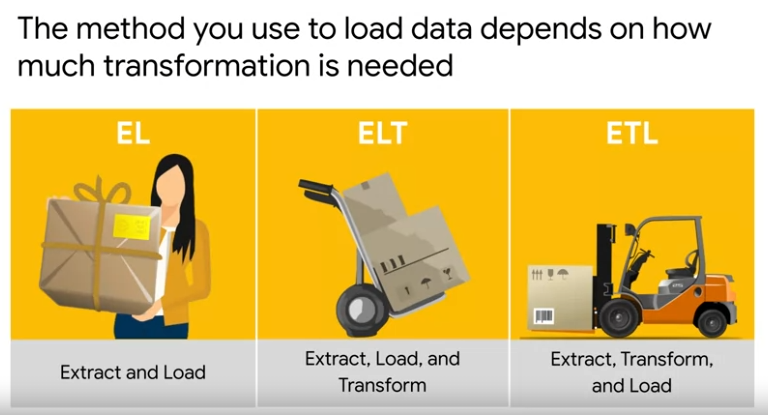

<font color='green'>**Video#3: Building a Data Lake using Cloud Storage**
- Google Cloud Storage is an object store, so it just stores and retrieves binary objects without regard to what data is contained in the objects. Howevever, it also provides file system compatibility and can make objects look like and work like as if they were files, so you can copy files in and out of it.
- Data and Cloud Storage persists beyond the lifetime of virtual machines or clusters. It's persistent and it's also relatively inexpensive compared to the cost of compute (so you can just save the state of the application running on VMs and turn them off when not needed)
- Data stored in Google storage can be shared globally and can be access from anywhere
- You can control who has access to what
- Two main componeents for Cloud Storage are Buckets and Objects
- Buckets are containers for Objects
- Bucket names are global and cannot be duplicated
- When an object is stored, cloud storage replicates that object, it'll then monitor the replicas and if one of them is lost or corrupted it'll replace it automatically with a fresh copy
- for multi-region bucket the objects are replicated across regions. And for a single region bucket as you might expect, the objects are replicated across zones within that one region.
- when the object is retrieved it's served up from the closest replica to the requester, that's how the low-latency happens
- multiple requesters could be retrieving the objects at the same time from different replicas, and that's how high throughput is achieved.
- When creating a bucket you need to determine its properties (such as location (region, zone), type of region (multi region or single region such as Europe north one and or Asia one), Third, you need to determine how often you need to access or change your data.

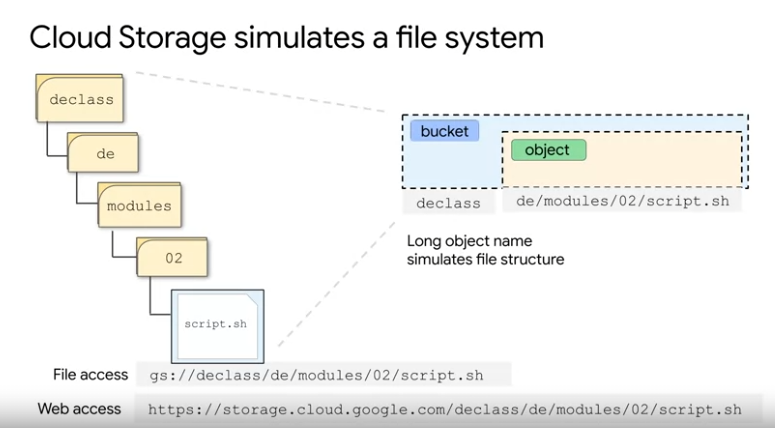

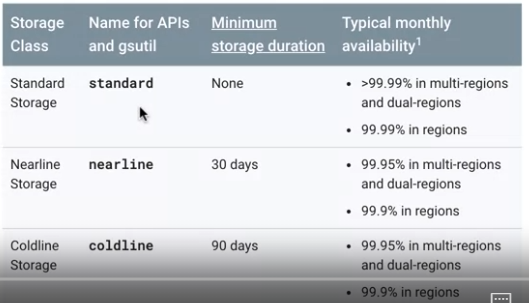

<font color='green'>**Video#5: Securing Cloud Storage**
- Controling access to Cloud Storage bucket

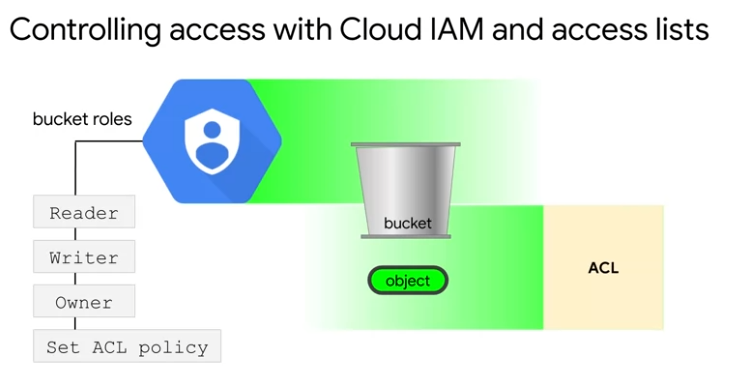

- ACL is Access Contrl List
- Cloud IAM is at a bucket level and applies to all objects withing a Bucket
- ACL give access at a bucket level or object level
- Data in Google Cloud is encrypted at rest and in transit using encryption keys and you can't turn off the encryption
- encryption keys are also encrypted themselves using Key Encryption Keys (KEK)
- You can either have Google Managed Encryption Keys (GMEK) or Cutomer Managed Encryption Keys (CMEK) or provide your own encryption Keys by using Customer Supplied ENcryption Keys (CSEK)

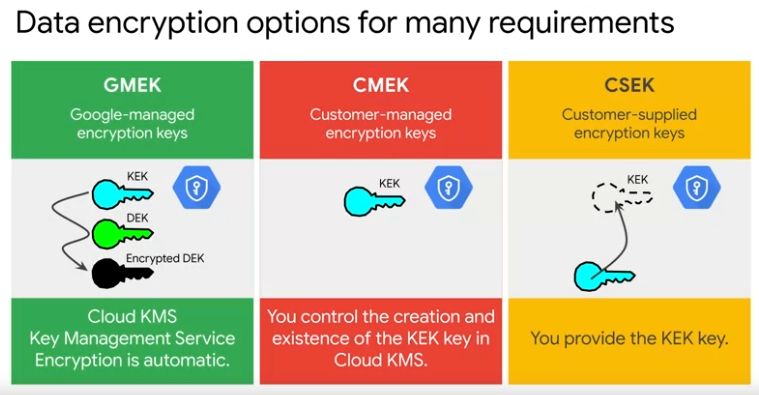

- Cloud Storage also supports Client-side encryption where data is encrypted before loading into Google and has to be decrypted before use
- Prevously mentioned encryption still apply even with client-side encryption
- Cloud storage supports logging of data access and those logs are immutable.
- You can also create locks that prevent data from being modified

<font color='green'>**Video#4: Stroing All Sorts of Data Types**
- Cloud storage is not suitable for all use cases (for example you don't want to use it for transactional workloads as seen below)

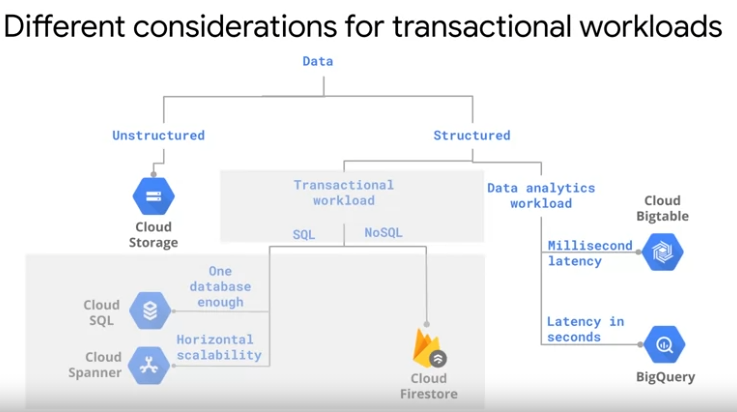

- Transactional versus analytical workloads can be identified by the characteristics defined in the image below

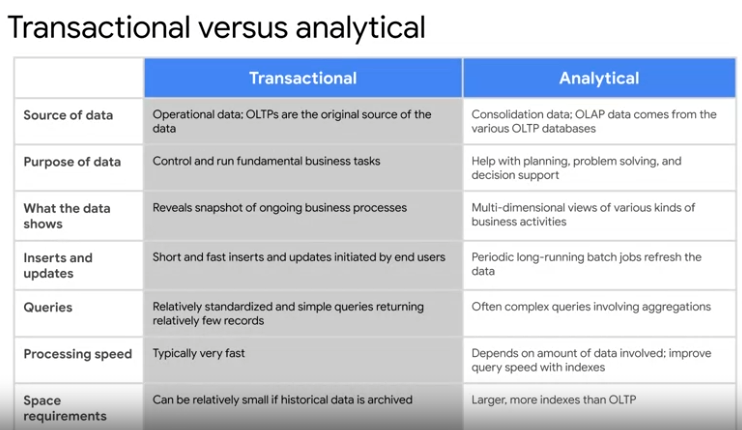

<font color='green'>**Video#5: Storing Relational Data in the Cloud**

- You've got a couple of different options for relational databases to store those transactions. The default choice here is Cloud SQL if you've got things in MySQL, Postgres or even SQL Server. But if you require a globally distributed database, then you could use Cloud Spanner. You'd want a globally distributed database if your database will see updates from applications running in different geographic regions. The true time capability of Spanner is very appealing for this kind of use case. Another reason you might choose Spanner is if your database is too big to fit in a single Cloud SQL instance. For database that has many gigabytes, you might want to consider using a distributed database. The scalability of Spanner is appealing for this use case. Other than that, you can use Cloud SQL because it's more cost effective. 

<font color='green'>**Video#6: Cloud SQL as a relational Data Lake**
- Cloud SQL is fully managed (Google does DBA work for you)
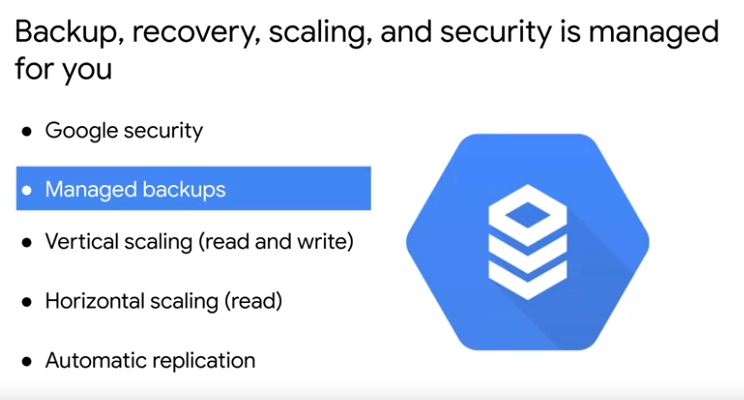

- Horizontally, you can quickly scale out read replicas, Google Cloud SQL supports 3 read replica scenarios. The first, Google Cloud SQL instance is replicating from a Cloud SQL Master instance, replicas are other instances in the same project and location as a master instance.
- Second, Cloud SQL instance is replicating from an external Master instance, therefore the master instance is external to Google Cloud SQL. For example, it can be outside the Google Network or in a Google compute engine instance, you can use this for backing up an on-premise SQL instance. Third, external SQL instances replicating from a Cloud SQL Master instance or replicas that are in a hosting environment that's outside of Cloud SQL.
- Serverless versus fully managed:

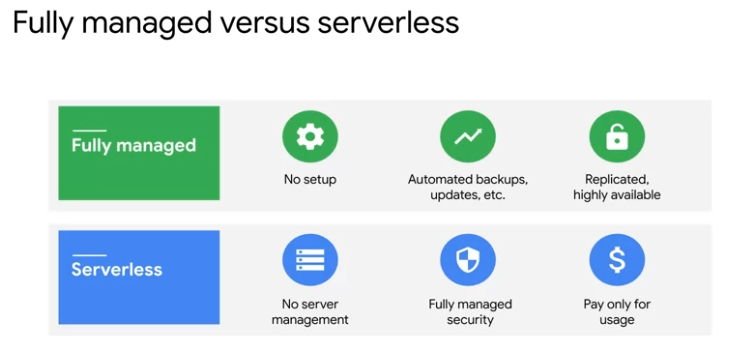

- By fully managed, we mean that the service runs on a hardware that you can control, you can SSH into a Cloud SQL instance for example.
- Serverless is the next step up, you can treat a serverless product that's just like an API that you're calling, sure you pay for using the product, but you don't have to worry about or manage any of the servers.

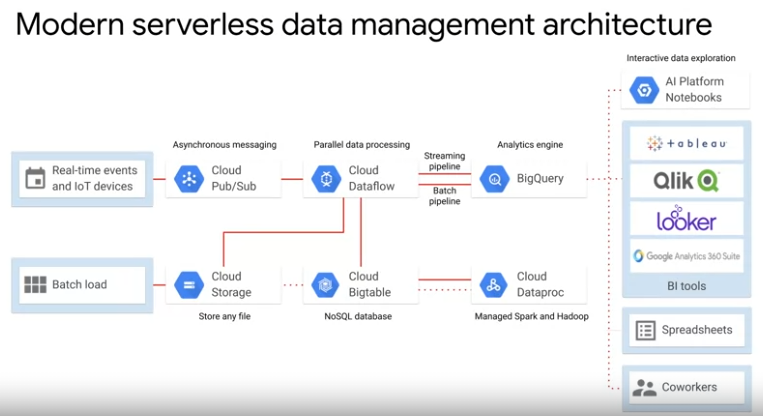